### Programming Exercise 1: Linear Regression

#### Warmup Excercise : Return the 5x5 identity matrix 

In [2]:
import numpy as np

In [3]:
def WarmUpExercise():
    return np.matrix(np.identity(5, dtype=int))  # the np.matrix is not recommended

In [4]:
A=WarmUpExercise()

In [5]:
A

matrix([[1, 0, 0, 0, 0],
        [0, 1, 0, 0, 0],
        [0, 0, 1, 0, 0],
        [0, 0, 0, 1, 0],
        [0, 0, 0, 0, 1]])

In [6]:
# use np.eye, by default get the same identity square matrix
np.eye(5)

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])

In [7]:
# non-squred matrix
np.eye(5,3)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [8]:
# move diagnal one row up
np.eye(5,5,1)

array([[0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0.]])

In [9]:
# move diagnal one row down
np.eye(5,3,-1)

array([[0., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 0.]])

###  Linear regression with one variable

In this part of this exercise, you will implement linear regression with one
variable to predict profits for a food truck. Suppose you are the CEO of a
restaurant franchise and are considering different cities for opening a new
outlet. The chain already has trucks in various cities and you have data for
profits and populations from the cities.

#### Load Data

The file ex1data1.txt contains the dataset for our linear regression problem.
The first column is the population of a city and the second column is
the profit of a food truck in that city. A negative value for profit indicates a
loss.

In [10]:
data = np.loadtxt('ex1data1.txt',delimiter=',')

In [11]:
# data1 will be an 97 * 2 array
print ('data.shape=',data.shape)
X = data[:,0]
Y = data[:,1]

data.shape= (97, 2)


In [12]:
import pandas as pd

In [13]:
# pandas dataframe
data1 = pd.read_csv('ex1data1.txt', names=['Population','Profit'])

In [14]:
print ('data11.shape=',data1.shape)
X1 = data1['Population'] # or X1 = data1.iloc[:,0]
Y1 = data1['Profit'] # or Y1 = data1.iloc[:,1]

data11.shape= (97, 2)


In [15]:
# sample data
data1[0:5]

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


#### Plotting Data

In [16]:
# auto reload modules
%reload_ext autoreload
%autoreload 2
#!pip install --user matplotlib

In [17]:
# https://matplotlib.org/users/pyplot_tutorial.html
import matplotlib.pyplot as plt

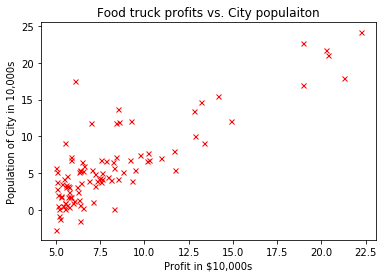

In [18]:
plt.plot(X,Y, 'rx', markersize=5) # plot data
plt.xlabel('Profit in $10,000s')  # x-axis label
plt.ylabel('Population of City in 10,000s') # y-axis label
plt.title('Food truck profits vs. City populaiton') # figure title
plt.show()

### Gradient Descent

- __Goal__: Fit the linear regression parameters $\theta$ to the above dataset using gradient descent <br>

- __Update Euqations__: The objective of linear regression is to minimize the cost function: 
$$J(\theta)=\frac{1}{2m}\sum_{i=1}^{m}(h_\theta(x^{(i)}) - y^{(i)})^2$$
where the hypothesis $h_\theta(x)$ is given by the linear model: $$h_\theta(x)=\theta^Tx=\theta_0 + \theta_1x_1$$ <br>
so we can calculate the partial derivative of $J(\theta)$ as:
$$\frac{\partial}{\partial\theta_0}J(\theta)=\frac{\partial}{\partial\theta_0}\left[\frac{1}{2m}\sum_{i=1}^{m}(\theta_0 + \theta_1x^{(i)}_1-y^{(i)})^2\right]=\frac{1}{m}\sum_{i=1}^{m}(\theta_0 + \theta_1x^{(i)}_1-y^{(i)})$$
$$\frac{\partial}{\partial\theta_1}J(\theta)=\frac{\partial}{\partial\theta_1}\left[\frac{1}{2m}\sum_{i=1}^{m}(\theta_0 + \theta_1x^{(i)}_1-y^{(i)})^2\right]=\frac{1}{m}\sum_{i=1}^{m}(\theta_0 + \theta_1x^{(i)}_1-y^{(i)})x^{(i)}_1$$ <br>

- __Batch gradient descent__: in each iteration, perform the update:
$$\theta_j := \theta_j - \alpha\frac{\partial}{\partial\theta_j}J(\theta)$$
where
$$\theta_j := \theta_j - \alpha\frac{1}{m}\sum_{i=1}^{m}(h_\theta(x^{(i)}-y^{(i)})x^{(i)}_j$$
Note, $x^{(i)}_0=1$

* __Prepare dataset__

In [42]:
#https://docs.scipy.org/doc/numpy/reference/generated/numpy.column_stack.html
m = len(data[:,0])
x0 = np.ones(m)
x1 = data[:,0] 
X = np.column_stack((x0,x1))  # add x0=1 to X

In [49]:
y = data[:,1]

* __computing the cost $J(\theta)$__

In [54]:
def computeCost(X, y, theta):
    m = len(y)
    yy = np.dot(X,theta)
    diff = yy - y
    cost = np.sum(np.square(diff)) / (2*m)
    return cost

In [144]:
# compute and display initial cost
J = computeCost(X, y, [0,0])
print('With theta = {0} Cost computed = {1:.2f}'.format([0,0],J))

With theta = [0, 0] Cost computed = 32.07


In [145]:
J = computeCost(X, y, [-1, 2])
print('With theta = {0} Cost computed = {1:.2f}'.format([-1, 2],J))

With theta = [-1, 2] Cost computed = 54.24


- __Run Gradient descent__

In [140]:
def compute_descent(X, y, theta):
    m = len(X)
    yy = np.dot(X, theta)
    diff = yy - y
    # apply diff dot product over each column of X
    descent = np.tensordot(X, diff, axes=[0,0])
    return descent / m

In [154]:
# use numpy tensordot to calculate summation along given axis
np.tensordot([[1,2],[3,4],[5,6]], [10,20,30], axes=[0,0])

array([220, 280])

In [158]:
def gradientDescent(X, y, theta, alpha, num_iters):
    J_history = np.zeros(num_iters)
    cur_iter = 0
    while cur_iter < num_iters:        
        J_history[cur_iter] = computeCost(X, y, theta)
        descent = compute_descent(X, y, theta)
        theta = theta - alpha * descent
        cur_iter += 1
    return theta, J_history

In [163]:
# run gradient descent with given initial setting
theta = np.zeros(2)
iterations = 1500
alpha = 0.01
fit_theta, J_hist = gradientDescent(X, y, theta, alpha, iterations)

In [164]:
print('Theta found by gradient descent: {0}'.format(fit_theta))

Theta found by gradient descent: [-3.63029144  1.16636235]


In [195]:
#Predict values for population sizes of 35,000 and 70,000
predict_x = np.array([[1, 3.5],[1, 7]])
predict_y = np.dot(predict_x, fit_theta)

In [198]:
print('For poplulation = {0}, predict profit={1}'.format(predict_x[:,1]*10000, predict_y * 10000))

For poplulation = [35000. 70000.], predict profit=[ 4519.7678677  45342.45012945]


- __Plot linear fitting result__

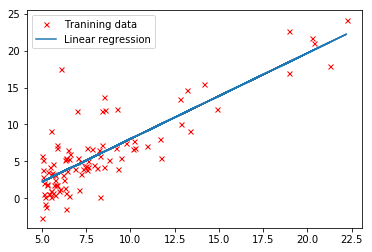

In [200]:
train_dot, = plt.plot(X[:,1], y, 'rx', markersize=5) # plot data
fit_line, = plt.plot(X[:,1], np.dot(X, fit_theta))
#predict_dot = plt.plot(predict_x[:,1], predict_y, 'go', markersize=10)
plt.legend([train_dot, fit_line],['Tranining data', 'Linear regression'])
plt.show()

#### Visualizing $J(\theta)$

In [202]:
# Grid over which we will calculate J
theta0_vals = np.linspace(-10, 10, 100);
theta1_vals = np.linspace(-1, 4, 100);

In [310]:
xv,yv = np.meshgrid(theta0_vals, theta1_vals) # get the grid index

In [311]:
grid_theta = np.dstack((xv,yv)) # stack theta0 and theta1, along the 3rd index

In [312]:
calc_cost = lambda theta : computeCost(X, y, theta)
J_vals = np.apply_along_axis(calc_cost, 2, grid_theta) # apply along 3rd index

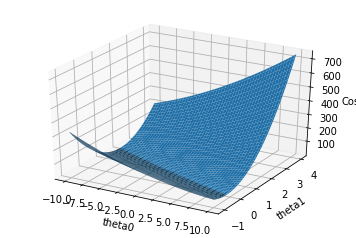

In [313]:
from mpl_toolkits.mplot3d import Axes3D
ax = plt.axes(projection='3d')
ax.plot_surface(X=xv,Y=yv,Z=J_vals)
ax.set_xlabel('theta0')
ax.set_ylabel('theta1')
ax.set_zlabel('Cost')
plt.show()

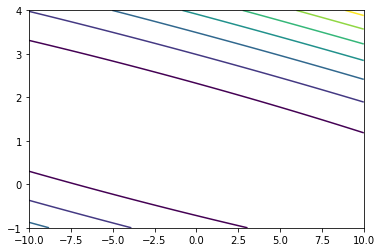

In [320]:
plt.contour(theta0_vals,theta1_vals,J_vals)
plt.show()